In [1]:
import numpy as np
import os
import struct
import requests

In [4]:
def get_number(byte):
    return int.from_bytes(byte, "big")
def parse_images(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        image_count = get_number(f.read(4))
        rows = get_number(f.read(4))
        cols = get_number(f.read(4))
        print("rows: ", rows, "cols", cols);
        images = np.zeros((image_count, rows, cols))

        current_img = 0
        current_row = 0
        current_col = 0

        while current_img < image_count:
            num = get_number(f.read(1))
            images[current_img, current_row, current_col] = num

            if current_row == rows - 1 and current_col == cols - 1:
                current_img += 1
                current_row = 0
                current_col = 0
            elif current_col == cols - 1:
                current_row += 1
                current_col = 0
            else:
                current_col += 1
    return images
def parse_labels(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        label_count = get_number(f.read(4))

        labels = np.zeros((label_count))
        current_label = 0

        while current_label < label_count:
            num = get_number(f.read(1))
            labels[current_label] = num
            current_label += 1

        return labels
def parse_data():
    train_images_path =os.path.abspath("train-images-idx3-ubyte")
    test_images_path = os.path.abspath("t10k-images-idx3-ubyte")

    train_labels_path =os.path.abspath("train-labels-idx1-ubyte")
    test_labels_path = os.path.abspath("t10k-labels-idx1-ubyte")

    x_train = parse_images(train_images_path)
    y_train = parse_labels(train_labels_path)

    x_test = parse_images(test_images_path)
    y_test = parse_labels(test_labels_path)

    return (x_train, y_train), (x_test, y_test)

In [5]:
(x_train, y_train), (x_test, y_test) = parse_data()

rows:  28 cols 28
rows:  28 cols 28


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Apply KNN Classifier (K=1)

In [183]:
import time
start_time_train = time.perf_counter()

In [184]:
knn = KNeighborsClassifier(n_neighbors=1)

In [185]:
knn.fit(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [186]:
end_time_train = time.perf_counter()
total_time_train = round(end_time_train - start_time_train, 3)
print('training time:',total_time_train)

training time: 12.092


In [187]:
knn.score(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

1.0

In [192]:
start_time_test = time.perf_counter()

In [193]:
knn.score(x_test.flatten().reshape(10000,784),y_test.reshape(10000,1))

0.9691

In [194]:
end_time_test = time.perf_counter()
total_time_test = round(end_time_test - start_time_test, 3)
print('testing time:',total_time_test)

testing time: 617.422


In [195]:
print('test error when k=1 ',round(1 -0.9691,3))

test error when k=1  0.031


# Apply K = 2

In [197]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))
start_time_test = time.perf_counter()
test_score = knn.score(x_test.flatten().reshape(10000,784),y_test.reshape(10000,1))
end_time_test = time.perf_counter()
total_time_test = round(end_time_test - start_time_test, 3)
print('test score:',test_score)
print('testing time:',total_time_test)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


test score: 0.9627
testing time: 622.901


# Apply logistic classifier

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
lr = LogisticRegression()

In [200]:
start_time_test = time.perf_counter()
lr.fit(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))
end_time_test = time.perf_counter()
total_time_test = round(end_time_test - start_time_test, 3)
print('testing time:',total_time_test)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


testing time: 7.238


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
lr.score(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

0.9339166666666666

In [25]:
lr.score(x_test.flatten().reshape(10000,784),y_test.reshape(10000,1))

0.9255

In [27]:
print('test error of Logistic Regression ',round(1-0.9255,4))

test error of Logistic Regression  0.0745


In [28]:
from sklearn.metrics import confusion_matrix

In [201]:
start_time_test = time.perf_counter()
y_predict = lr.predict(x_test.flatten().reshape(10000,784))
end_time_test = time.perf_counter()
total_time_test = round(end_time_test - start_time_test, 3)
print('testing time:',total_time_test)

testing time: 0.04


In [143]:
confusion_table = confusion_matrix(y_test.reshape(10000,1), y_predict)
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
confusion_table

array([[9.83e-01, 0.00e+00, 0.00e+00, 2.97e-03, 1.02e-03, 3.36e-03,
        4.18e-03, 3.89e-03, 2.05e-03, 0.00e+00],
       [0.00e+00, 9.80e-01, 3.88e-03, 1.98e-03, 0.00e+00, 1.12e-03,
        3.13e-03, 1.95e-03, 1.13e-02, 0.00e+00],
       [3.06e-03, 8.81e-03, 8.97e-01, 1.49e-02, 6.11e-03, 4.48e-03,
        1.57e-02, 7.78e-03, 4.31e-02, 2.97e-03],
       [4.08e-03, 8.81e-04, 2.03e-02, 9.07e-01, 1.02e-03, 2.91e-02,
        3.13e-03, 8.75e-03, 2.26e-02, 6.94e-03],
       [1.02e-03, 8.81e-04, 6.78e-03, 2.97e-03, 9.27e-01, 0.00e+00,
        9.39e-03, 6.81e-03, 1.03e-02, 3.37e-02],
       [1.12e-02, 1.76e-03, 9.69e-04, 3.27e-02, 1.12e-02, 8.70e-01,
        1.15e-02, 5.84e-03, 3.59e-02, 5.95e-03],
       [9.18e-03, 2.64e-03, 6.78e-03, 2.97e-03, 7.13e-03, 1.79e-02,
        9.50e-01, 1.95e-03, 1.03e-03, 0.00e+00],
       [1.02e-03, 5.29e-03, 2.33e-02, 4.95e-03, 7.13e-03, 1.12e-03,
        0.00e+00, 9.25e-01, 3.08e-03, 2.97e-02],
       [8.16e-03, 6.17e-03, 5.81e-03, 2.28e-02, 6.11e-03, 2.91e-

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       980
         1.0       0.97      0.98      0.97      1135
         2.0       0.93      0.90      0.91      1032
         3.0       0.90      0.91      0.91      1010
         4.0       0.93      0.93      0.93       982
         5.0       0.90      0.87      0.89       892
         6.0       0.94      0.95      0.95       958
         7.0       0.93      0.93      0.93      1028
         8.0       0.87      0.89      0.88       974
         9.0       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



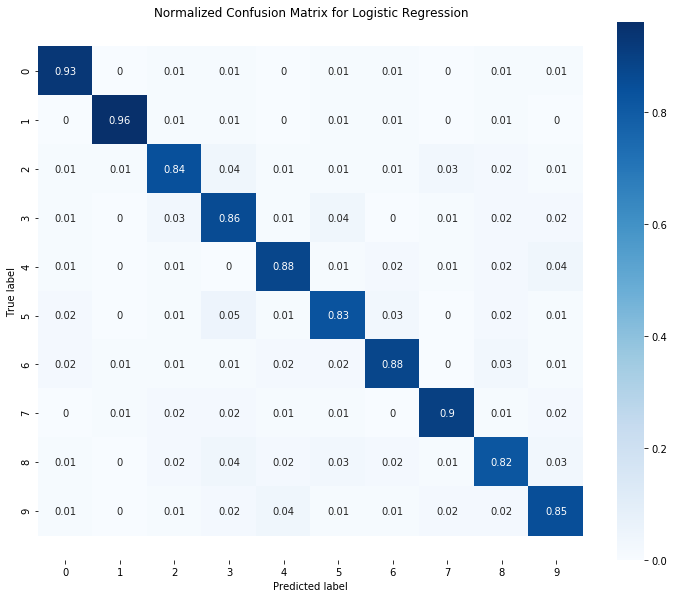

In [173]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
ax = sns.heatmap(confusion_table.round(2), annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Logistic Regression')
plt.savefig('Normalized Confusion Matrix for Logistic Regression.png')
plt.show()

# Apply Decision Tree

In [203]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [205]:
start_time_test = time.perf_counter()
clf = clf.fit(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))
end_time_test = time.perf_counter()
total_time_test = round(end_time_test - start_time_test, 3)
print('testing time:',total_time_test)

testing time: 20.212


In [206]:
start_time_test = time.perf_counter()
y_pred = clf.predict(x_test.flatten().reshape(10000,784))
end_time_test = time.perf_counter()
total_time_test = round(end_time_test - start_time_test, 3)
print('testing time:',total_time_test)

testing time: 0.04


In [159]:
from sklearn.metrics import accuracy_score
print("accuracy of decision tree is: ",(accuracy_score(y_test.reshape(10000,1),y_pred).round(3)))

accuracy of decision tree is:  0.878


In [161]:
confusion_table = confusion_matrix(y_test.reshape(10000,1), y_pred)
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
confusion_table

array([[0.93, 0.  , 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.01],
       [0.  , 0.96, 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.  ],
       [0.01, 0.01, 0.84, 0.04, 0.01, 0.01, 0.01, 0.03, 0.02, 0.01],
       [0.01, 0.  , 0.03, 0.86, 0.01, 0.04, 0.  , 0.01, 0.02, 0.02],
       [0.01, 0.  , 0.01, 0.  , 0.88, 0.01, 0.02, 0.01, 0.02, 0.04],
       [0.02, 0.  , 0.01, 0.05, 0.01, 0.83, 0.03, 0.  , 0.02, 0.01],
       [0.02, 0.01, 0.01, 0.01, 0.02, 0.02, 0.88, 0.  , 0.03, 0.01],
       [0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.  , 0.9 , 0.01, 0.02],
       [0.01, 0.  , 0.02, 0.04, 0.02, 0.03, 0.02, 0.01, 0.82, 0.03],
       [0.01, 0.  , 0.01, 0.02, 0.04, 0.01, 0.01, 0.02, 0.02, 0.85]])

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       980
         1.0       0.95      0.96      0.96      1135
         2.0       0.87      0.84      0.86      1032
         3.0       0.81      0.86      0.83      1010
         4.0       0.89      0.88      0.88       982
         5.0       0.84      0.83      0.83       892
         6.0       0.89      0.88      0.89       958
         7.0       0.92      0.90      0.91      1028
         8.0       0.84      0.82      0.83       974
         9.0       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



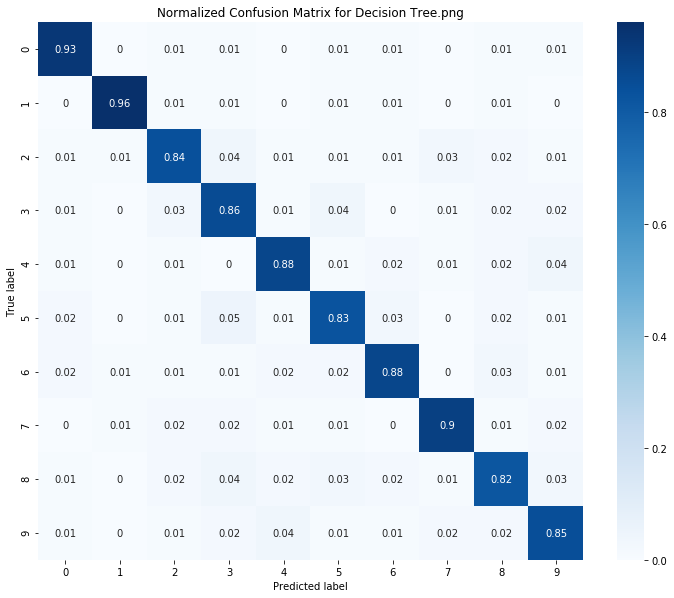

In [176]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
ax = sns.heatmap(confusion_table.round(2), annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Decision Tree.png')
plt.show()

# Try to decompose data using PCA

In [209]:
from sklearn.decomposition import PCA

In [211]:
pca = PCA(n_components=2)
pca.fit(x_train.flatten().reshape(60000,784))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [212]:
print(pca.explained_variance_ratio_)

[0.1  0.07]


In [213]:
print(pca.singular_values_)

[141291.   120817.19]


In [214]:
x_train_tr = pca.transform = pca.transform(x_train.flatten().reshape(60000,784))

In [ ]:
# try different components and inspect variance
n_components = np.arange(499)+1

variance = []
for n in n_components:
    pca = PCA(n_components = n)
    pca.fit(x_train.flatten().reshape(60000,784))
    variance.append(sum(pca.explained_variance_ratio_))
    
results = pd.DataFrame()
results['n_components'] = n_components
reuslts['variance'] = variance
results

In [223]:
results

,n_components
0,1
1,2
2,3
3,4
4,5
...,...
494,495
495,496
496,497
497,498


In [225]:
results['variance'] = variance
results.head(3)

,n_components,variance
0,1,0.097047
1,2,0.168006
2,3,0.229697


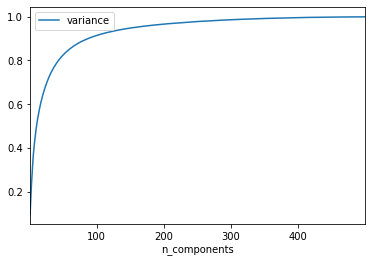

In [227]:
results.plot.line(x='n_components',y='variance')

In [230]:
# try different components and inspect accuracy
n_components = np.arange(25)+1
knn = KNeighborsClassifier()
train_score = []
test_score = []

for n in n_components:
    pca = PCA(n_components = n)
    pca.fit(x_train.flatten().reshape(60000,784))
    x_train_tr = pca.transform(x_train.flatten().reshape(60000,784))
    x_test_tr = pca.transform(x_test.flatten().reshape(10000,784))
    knn.fit(x_train_tr,y_train.reshape(60000,1))
    train_score.append(knn.score(x_train_tr,y_train.reshape(60000,1)))
    test_score.append(knn.score(x_test_tr,y_test.reshape(10000,1)))
    
accuracy = pd.DataFrame()
accuracy['n_components'] = n_components
accuracy['train_score'] = train_score
accuracy['test_score'] = test_score
accuracy

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/opt

,n_components,train_score,test_score
0,1,0.479617,0.2733
1,2,0.587950,0.4242
2,3,0.630550,0.4874
3,4,0.732267,0.6328
4,5,0.813633,0.7474
5,6,0.878350,0.8321
6,7,0.910483,0.8722
7,8,0.931917,0.9010
8,9,0.944167,0.9138
9,10,0.954500,0.9276


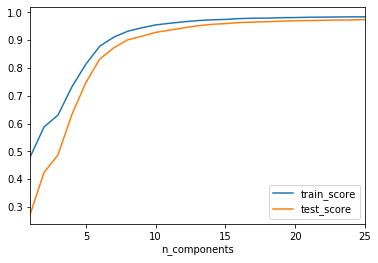

In [232]:
ax1=accuracy.plot.line(x='n_components',y='train_score')
accuracy.plot.line(x='n_components',y='test_score',ax=ax1)

In [241]:
# PCA + KNN
pca = PCA(n_components=25)
pca.fit(x_train.flatten().reshape(60000,784))
x_train_tr = pca.transform(x_train.flatten().reshape(60000,784))
x_test_tr = pca.transform(x_test.flatten().reshape(10000,784))

start_time_train = time.perf_counter()

knn.fit(x_train_tr,y_train.reshape(60000,1))

end_time_train = time.perf_counter()
total_time_train = round(end_time_train - start_time_train, 3)
print('training time:',total_time_train)

start_time_test = time.perf_counter()

y_predict = knn.predict(x_test_tr)

end_time_test = time.perf_counter()
total_time_train = round(end_time_test - start_time_test, 3)
print('testing time:',total_time_test)

train_score = knn.score(x_train_tr,y_train.reshape(60000,1))
test_score = knn.score(x_test_tr,y_test.reshape(10000,1))

print('train error: ', 1-train_score)
print('test error: ', 1- test_score)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


training time: 0.248
testing time: 0.04
train error:  0.016416666666666635
test error:  0.02639999999999998


In [235]:
print('test error', round(1-test_score,3))

test error 0.026


In [236]:
confusion_table = confusion_matrix(y_test.reshape(10000,1), y_predict)
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
confusion_table

array([[9.92e-01, 8.81e-04, 9.69e-04, 0.00e+00, 0.00e+00, 1.12e-03,
        4.18e-03, 9.73e-04, 0.00e+00, 0.00e+00],
       [0.00e+00, 9.96e-01, 2.91e-03, 9.90e-04, 0.00e+00, 0.00e+00,
        1.04e-03, 0.00e+00, 0.00e+00, 0.00e+00],
       [7.14e-03, 8.81e-04, 9.75e-01, 0.00e+00, 1.02e-03, 0.00e+00,
        3.13e-03, 8.75e-03, 5.13e-03, 0.00e+00],
       [0.00e+00, 8.81e-04, 2.91e-03, 9.61e-01, 0.00e+00, 1.79e-02,
        0.00e+00, 6.81e-03, 1.03e-02, 1.98e-03],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 9.71e-01, 0.00e+00,
        6.26e-03, 1.95e-03, 0.00e+00, 1.98e-02],
       [3.06e-03, 8.81e-04, 9.69e-04, 9.90e-03, 1.02e-03, 9.71e-01,
        6.26e-03, 9.73e-04, 1.03e-03, 1.98e-03],
       [2.04e-03, 2.64e-03, 0.00e+00, 0.00e+00, 3.05e-03, 1.12e-03,
        9.91e-01, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.02e-03, 1.59e-02, 1.16e-02, 0.00e+00, 2.04e-03, 0.00e+00,
        0.00e+00, 9.60e-01, 0.00e+00, 7.93e-03],
       [3.06e-03, 0.00e+00, 1.94e-03, 1.39e-02, 2.04e-03, 5.61e-

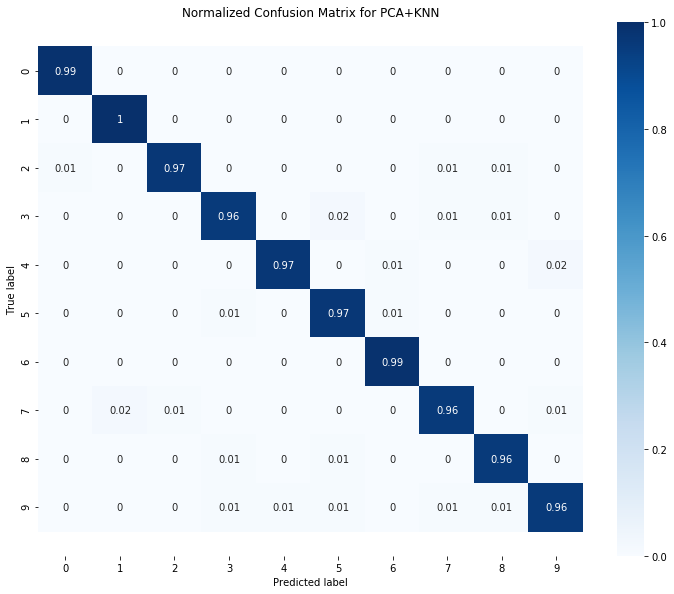

In [242]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
ax = sns.heatmap(confusion_table.round(2), annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for PCA+KNN')
plt.show()

In [239]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       980
         1.0       0.98      1.00      0.99      1135
         2.0       0.98      0.97      0.98      1032
         3.0       0.97      0.96      0.97      1010
         4.0       0.98      0.97      0.98       982
         5.0       0.97      0.97      0.97       892
         6.0       0.98      0.99      0.98       958
         7.0       0.97      0.96      0.97      1028
         8.0       0.98      0.96      0.97       974
         9.0       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [243]:
knn = KNeighborsClassifier(n_neighbors=1)
# PCA + KNN
pca = PCA(n_components=25)
pca.fit(x_train.flatten().reshape(60000,784))
x_train_tr = pca.transform(x_train.flatten().reshape(60000,784))
x_test_tr = pca.transform(x_test.flatten().reshape(10000,784))

start_time_train = time.perf_counter()

knn.fit(x_train_tr,y_train.reshape(60000,1))

end_time_train = time.perf_counter()
total_time_train = round(end_time_train - start_time_train, 3)
print('training time:',total_time_train)

start_time_test = time.perf_counter()

y_predict = knn.predict(x_test_tr)

end_time_test = time.perf_counter()
total_time_train = round(end_time_test - start_time_test, 3)
print('testing time:',total_time_test)

train_score = knn.score(x_train_tr,y_train.reshape(60000,1))
test_score = knn.score(x_test_tr,y_test.reshape(10000,1))

print('train error: ', 1-train_score)
print('test error: ', 1- test_score)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


training time: 0.249
testing time: 0.04
train error:  0.0
test error:  0.029100000000000015


## Analyze Eigenfaces

In [273]:
x_train_tr

array([[ 123.93, -312.67,  -24.51, ..., -218.05,  250.72,   44.6 ],
       [1011.72, -294.86,  596.34, ...,   -1.15,   19.28,  231.67],
       [ -51.85,  392.17, -188.51, ...,  120.2 ,   -9.25, -123.78],
       ...,
       [-178.05,  160.08, -257.61, ..., -206.11,  -67.32, -368.85],
       [ 130.61,   -5.59,  513.86, ...,  -42.11,  -91.26,  150.81],
       [-173.44,  -24.72,  556.02, ..., -121.08, -134.93,  -75.12]])

(784,)


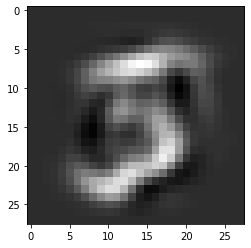

In [268]:
reconstructed = pca.inverse_transform(x_train_tr[0])
print(reconstructed.shape)
plt.imshow(reconstructed.reshape(28,28),cmap = plt.cm.gray)

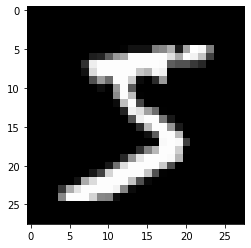

In [267]:
plt.imshow(x_train[0,:,:],cmap = plt.cm.gray)

In [294]:
recon = pca.inverse_transform(x_train_tr)
recon_df = pd.DataFrame.from_records(recon)
recon_df.head(3).round(2)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,-0.50,-0.31,-0.16,-0.09,-0.10,-0.02,0.0,0.0,0.0,0.0
1,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.03,-0.08,-0.04,0.00,0.03,0.01,0.0,0.0,0.0,0.0
2,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,...,2.05,0.98,0.49,0.16,0.11,0.01,0.0,0.0,0.0,0.0


In [295]:
recon_df['label'] = y_train

In [302]:
recon_df['label'].dtype

dtype('float64')

In [336]:
# See the importance of 5
recon_five = recon_df[recon_df.label == 5]
recon_five.mean().sort_values(ascending=False)

375    176.919689
374    174.080594
347    169.377670
346    167.880527
376    159.325136
          ...    
66      -0.655182
92      -0.933733
95      -1.184061
93      -1.387122
94      -1.612986
Length: 785, dtype: float64

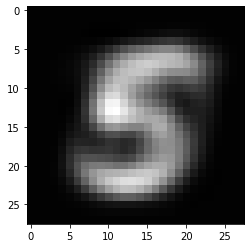

In [359]:
plt.imshow(recon_five.mean()[0:-1].to_numpy().reshape(28,28),cmap = plt.cm.gray)

## Deeper analysis on choosing the right component for PCA

In [361]:
# try different components and inspect accuracy
n_components = np.arange(30)+1
knn = KNeighborsClassifier()
train_score = []
test_score = []
variance = []
total_time = []

for n in n_components:
    pca = PCA(n_components = n)
    pca.fit(x_train.flatten().reshape(60000,784))
    variance.append(sum(pca.explained_variance_ratio_))
    x_train_tr = pca.transform(x_train.flatten().reshape(60000,784))
    x_test_tr = pca.transform(x_test.flatten().reshape(10000,784))
    start_time = time.perf_counter()
    knn.fit(x_train_tr,y_train.reshape(60000,1))
    train_score.append(knn.score(x_train_tr,y_train.reshape(60000,1)))
    test_score.append(knn.score(x_test_tr,y_test.reshape(10000,1)))
    end_time = time.perf_counter()
    total_time.append(round(end_time - start_time,4))
    
analysis = pd.DataFrame()
analysis['n_components'] = n_components
analysis['explained_variance'] = variance
analysis['train_score'] = train_score
analysis['test_score'] = test_score
analysis['total_time_knn'] = total_time
accuracy

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

,n_components,train_score,test_score
0,1,0.479617,0.2733
1,2,0.587950,0.4242
2,3,0.630550,0.4874
3,4,0.732267,0.6328
4,5,0.813633,0.7474
5,6,0.878350,0.8321
6,7,0.910483,0.8722
7,8,0.931917,0.9010
8,9,0.944167,0.9138
9,10,0.954500,0.9276


In [362]:
analysis

,n_components,explained_variance,train_score,test_score,total_time_knn
0,1,0.097047,0.478533,0.2748,2.2395
1,2,0.168006,0.588283,0.4242,2.2331
2,3,0.229697,0.630433,0.4875,2.3437
3,4,0.283591,0.732250,0.6327,2.5699
4,5,0.332279,0.813583,0.7474,2.9949
5,6,0.375401,0.878383,0.8322,3.7188
6,7,0.408120,0.910500,0.8723,4.6268
7,8,0.436959,0.931900,0.9010,5.6587
8,9,0.464580,0.944183,0.9140,7.2665
9,10,0.488150,0.954533,0.9275,8.7626


Text(0.5, 1.0, 'accuracy analysis on PCA component numbers')

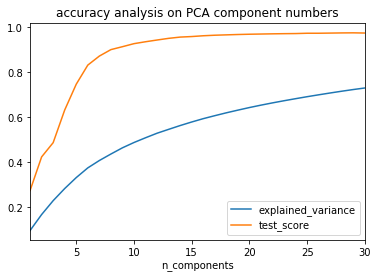

In [370]:
ax1 = analysis.plot.line(x='n_components',y='explained_variance')
ax2 = analysis.plot.line(x='n_components',y='test_score',ax=ax1)
plt.title('accuracy analysis on PCA component numbers')

Text(0.5, 1.0, 'trade-off on PCA component numbers')

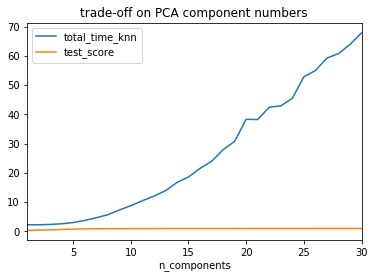

In [398]:
ax1 = analysis.plot.line(x='n_components',y='total_time_knn')
ax2 = analysis.plot.line(x='n_components',y='test_score',ax=ax1)
plt.title('trade-off on PCA component numbers')

In [372]:
pca = PCA(n_components = 25)
pca.fit(x_train.flatten().reshape(60000,784))
x_train_tr = pca.transform(x_train.flatten().reshape(60000,784))
x_test_tr = pca.transform(x_test.flatten().reshape(10000,784))
start_time = time.perf_counter()
knn.fit(x_train_tr,y_train.reshape(60000,1))
end_time = time.perf_counter()
total_time = round(end_time - start_time,4)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [377]:
df_loadings = pd.DataFrame(pca.components_,
                          columns=df.columns,)
df_loadings.head(3).round(3)# How much original features are contained in the new features.

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,-0.000,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
1,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,0.001,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
2,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [379]:
df_loadings.sum().sort_values(ascending=False)

233    0.807812
260    0.708157
232    0.696515
547    0.676531
548    0.669959
         ...   
155   -0.508337
183   -0.518973
658   -0.582818
656   -0.619541
657   -0.698839
Length: 784, dtype: float64

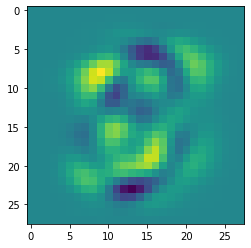

In [381]:
plt.imshow(df_loadings.sum().to_numpy().reshape(28,28))

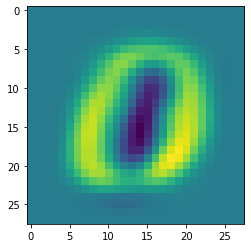

In [394]:
plt.imshow(df_loadings.iloc[0,:].to_numpy().reshape(28,28))

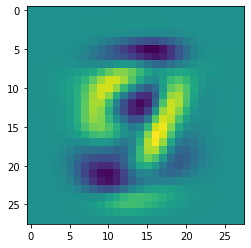

In [395]:
plt.imshow(df_loadings.iloc[1,:].to_numpy().reshape(28,28))